In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [488]:
df = pd.read_csv("C:/Users/DEEPANSH/Desktop/analytics project/Task 3/N1.csv")
df = df.drop(columns ='Unnamed: 0')

In [489]:
pd.set_option('display.max_columns', 50)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,age,gender,country
0,1,1,5,1,1,1,1,1,1,1,1,5,1,1,5,5,1,1,5,5,1,5,1,1,5,1,5,1,5,5,5,5,5,1,5,5,35,1,US
1,2,3,3,3,4,4,3,3,3,4,4,3,3,3,3,3,3,3,2,2,2,3,3,4,3,4,3,3,3,3,3,3,4,4,4,3,51,2,US
2,2,3,5,3,1,3,1,2,5,4,1,3,1,3,5,4,1,3,5,3,1,3,1,2,4,3,5,4,5,4,4,4,4,4,4,4,38,1,US
3,1,4,4,5,3,4,2,3,1,4,3,4,1,5,4,4,1,3,4,2,4,1,1,2,5,3,3,2,3,4,2,3,4,4,4,2,30,3,US
4,4,4,2,3,3,4,4,3,3,3,3,1,4,3,2,1,3,4,2,1,2,3,3,2,2,3,3,2,2,4,2,4,4,5,2,3,24,2,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,2,2,4,2,2,2,2,1,2,2,2,4,2,2,4,2,2,3,4,4,2,2,2,4,4,4,4,2,2,4,4,4,4,3,4,3,23,2,US
10002,2,3,2,1,2,2,2,2,2,2,1,1,2,2,2,2,1,2,4,2,2,4,2,2,4,2,4,2,4,4,4,2,4,3,4,2,28,1,US
10003,2,2,4,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,4,2,2,4,2,4,2,2,2,4,2,4,2,4,2,28,1,US
10004,2,3,4,4,2,4,1,3,2,2,2,1,1,2,5,2,2,4,4,4,1,4,2,3,3,3,4,1,5,2,5,2,5,2,4,1,25,2,US


In [490]:
# Hypothesis - 1 
# In a romantic partnership, young males (<30) are more anxious and insecure than young females.

In [491]:
df1 = df[(df['age'] < 30)]

In [492]:
# male dataset age <30
df1_m = df1[(df1['gender'] == 1)]
# female dataset age <30
df1_f = df1[(df1['gender'] == 2)]

In [494]:
# relevant Questions 4,6,10,28,32,34
df1_m = df1_m[['Q4', 'Q6', 'Q10','Q28','Q32', 'Q34', 'age', 'country']]
df1_f = df1_f[['Q4', 'Q6', 'Q10','Q28','Q32', 'Q34', 'age', 'country']]

In [495]:
# replacing 1,2 which is disagree with -2,-1 respectively
# replacing 4,5 which is agree with 1,2 respectively
# replacing 3 which is neither with 0
df1_m = df1_m.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])
df1_f = df1_f.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])

In [496]:
# scoring denotes how stongly they feel anxiousness or insecure in a relationship
columns = ['Q4', 'Q6','Q10','Q28','Q32', 'Q34']
df1_m['resultant_score'] = df1_m[list(columns)].sum(axis=1)
df1_f['resultant_score'] = df1_f[list(columns)].sum(axis=1)

Text(0.5, 1.0, 'Female')

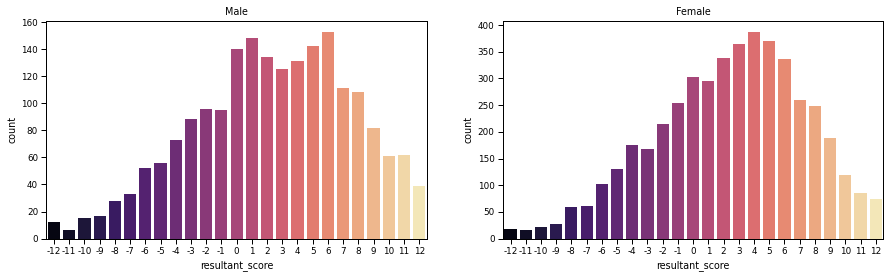

In [497]:
# create plot
fig, ax =plt.subplots(1,2,figsize=(15,4))
sns.countplot(x = 'resultant_score', data = df1_m, palette = 'magma', ax = ax[0]).set_title('Male')
sns.countplot(x = 'resultant_score', data = df1_f, palette = 'magma',ax = ax[1]).set_title('Female')

In [498]:
# Considering the fact that there might be cases were the score is neutralised
# Thus considering only highy probable cases where they strongly agree with the hypothesis
# Lets assume the score should be atleast 2 

In [499]:
print('Mean score:', df1_m[(df1_m['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df1_m[(df1_m['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df1_m[(df1_m['resultant_score'] >2)]['resultant_score'].std())

Mean score: 6.57396449704142
Median score: 6.0
Std Dev score: 2.565615267458067


In [500]:
print('Mean score:', df1_f[(df1_f['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df1_f[(df1_f['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df1_f[(df1_f['resultant_score'] >2)]['resultant_score'].std())

Mean score: 6.175842235004109
Median score: 6.0
Std Dev score: 2.4647735642747617


In [501]:
# Result of Hypothesis suggests
# Mean score of male > females

# Thus hypothesis is True
# yes young male age < 30 in a  are more anxious and insecure than young females.

In [502]:
# Hypothesis - 2
# In a partnership (romantic or non romantic), males are more expressive (less hesitant) than females.

In [503]:
df2 = df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,age,gender,country
0,1,1,5,1,1,1,1,1,1,1,1,5,1,1,5,5,1,1,5,5,1,5,1,1,5,1,5,1,5,5,5,5,5,1,5,5,35,1,US
1,2,3,3,3,4,4,3,3,3,4,4,3,3,3,3,3,3,3,2,2,2,3,3,4,3,4,3,3,3,3,3,3,4,4,4,3,51,2,US
2,2,3,5,3,1,3,1,2,5,4,1,3,1,3,5,4,1,3,5,3,1,3,1,2,4,3,5,4,5,4,4,4,4,4,4,4,38,1,US
3,1,4,4,5,3,4,2,3,1,4,3,4,1,5,4,4,1,3,4,2,4,1,1,2,5,3,3,2,3,4,2,3,4,4,4,2,30,3,US
4,4,4,2,3,3,4,4,3,3,3,3,1,4,3,2,1,3,4,2,1,2,3,3,2,2,3,3,2,2,4,2,4,4,5,2,3,24,2,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,2,2,4,2,2,2,2,1,2,2,2,4,2,2,4,2,2,3,4,4,2,2,2,4,4,4,4,2,2,4,4,4,4,3,4,3,23,2,US
10002,2,3,2,1,2,2,2,2,2,2,1,1,2,2,2,2,1,2,4,2,2,4,2,2,4,2,4,2,4,4,4,2,4,3,4,2,28,1,US
10003,2,2,4,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,4,2,2,4,2,4,2,2,2,4,2,4,2,4,2,28,1,US
10004,2,3,4,4,2,4,1,3,2,2,2,1,1,2,5,2,2,4,4,4,1,4,2,3,3,3,4,1,5,2,5,2,5,2,4,1,25,2,US


In [504]:
# male dataset 
df2_m = df2[(df2['gender'] == 1)]
# female dataset 
df2_f = df2[(df2['gender'] == 2)]

In [505]:
# relevant Questions 1,9,15,25,27,31,33,35
df2_m = df2_m[['Q1', 'Q9', 'Q15','Q25','Q27', 'Q31', 'Q33', 'Q35', 'age', 'country']]
df2_f = df2_f[['Q1', 'Q9', 'Q15','Q25','Q27', 'Q31', 'Q33', 'Q35', 'age', 'country']]

In [506]:
# replacing 1,2 which is disagree with -2,-1 respectively
# replacing 4,5 which is agree with 1,2 respectively
# replacing 3 which is neither with 0
df2_m = df2_m.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])
df2_f = df2_f.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])

In [507]:
# Aligning the questions according to hypothesis by just changing the sign 
df2_m['Q1'] = -df2_m['Q1']
df2_f['Q1'] = -df2_f['Q1']
df2_m['Q9'] = -df2_m['Q9']
df2_f['Q9'] = -df2_f['Q9']

In [508]:
# scoring denotes how stongly they express themselves
columns = ['Q1', 'Q9', 'Q15','Q25','Q27', 'Q31', 'Q33', 'Q35']
df2_m['resultant_score'] = df2_m[list(columns)].sum(axis=1)
df2_f['resultant_score'] = df2_f[list(columns)].sum(axis=1)

Text(0.5, 1.0, 'Female')

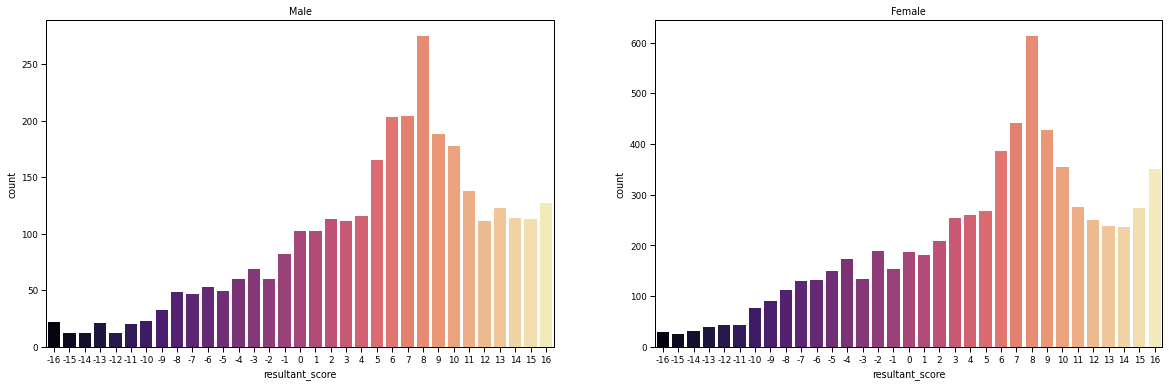

In [509]:
# create plot
fig, ax =plt.subplots(1,2,figsize=(20,6))
sns.countplot(x = 'resultant_score', data = df2_m, palette = 'magma', ax = ax[0]).set_title('Male')
sns.countplot(x = 'resultant_score', data = df2_f, palette = 'magma',ax = ax[1]).set_title('Female')

In [510]:
# Considering the fact that there might be cases were the score is neutralised
# Thus considering only highy probable cases where they strongly agree with the hypothesis
# Lets assume from the graph the score should be atleast 4


In [511]:
print('Mean score:', df2_m[(df2_m['resultant_score'] >4)]['resultant_score'].mean())
print('Median score:', df2_m[(df2_m['resultant_score'] >4)]['resultant_score'].median())
print('Std Dev score:', df2_m[(df2_m['resultant_score'] >4)]['resultant_score'].std())

Mean score: 9.755028365136669
Median score: 9.0
Std Dev score: 3.3144956728350814


In [512]:
print('Mean score:', df2_f[(df2_f['resultant_score'] >4)]['resultant_score'].mean())
print('Median score:', df2_f[(df2_f['resultant_score'] >4)]['resultant_score'].median())
print('Std Dev score:', df2_f[(df2_f['resultant_score'] >4)]['resultant_score'].std())

Mean score: 10.00948212983224
Median score: 9.0
Std Dev score: 3.3576756756474713


In [513]:
# Result of Hypothesis suggests
# Mean score of male < females

# Thus hypothesis is False
# In a partnership (romantic or non romantic), males are 'NOT' more expressive (less hesitant) than females.

In [514]:
# Hypothesis - 3
# An American of age 30+ likes to be closer to romantic partners than an Indian of the same age does.

In [515]:
df3 = df
df3 = df3[(df3['age'] > 30)]

In [516]:
# US dataset 
df3_us = df3[(df3['country'] == 'US')]
# IN dataset 
df3_in = df3[(df3['country'] == 'IN')]

In [518]:
# relevant Questions 3,7,9,21,23,29,31,33,
df3_us = df3_us[['Q3', 'Q7', 'Q9','Q21','Q23', 'Q29', 'Q31', 'Q33', 'age', 'gender']]
df3_in = df3_in[['Q3', 'Q7', 'Q9','Q21','Q23', 'Q29', 'Q31', 'Q33', 'age', 'gender']]

In [519]:
# replacing 1,2 which is disagree with -2,-1 respectively
# replacing 4,5 which is agree with 1,2 respectively
# replacing 3 which is neither with 0
df3_us = df3_us.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])
df3_in = df3_in.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])

In [520]:
# Aligning the questions according to hypothesis by just changing the sign 
df3_us['Q7'] = -df3_us['Q7']
df3_in['Q7'] = -df3_in['Q7']
df3_us['Q9'] = -df3_us['Q9']
df3_in['Q9'] = -df3_in['Q9']
df3_us['Q21'] = -df3_us['Q21']
df3_in['Q21'] = -df3_in['Q21']
df3_us['Q23'] = -df3_us['Q23']
df3_in['Q23'] = -df3_in['Q23']

In [521]:
# scoring denotes how stongly they like to be closer to their romantic patner
columns = ['Q3', 'Q7', 'Q9','Q21','Q23', 'Q29', 'Q31', 'Q33']
df3_us['resultant_score'] = df3_us[list(columns)].sum(axis=1)
df3_in['resultant_score'] = df3_in[list(columns)].sum(axis=1)

Text(0.5, 1.0, 'India')

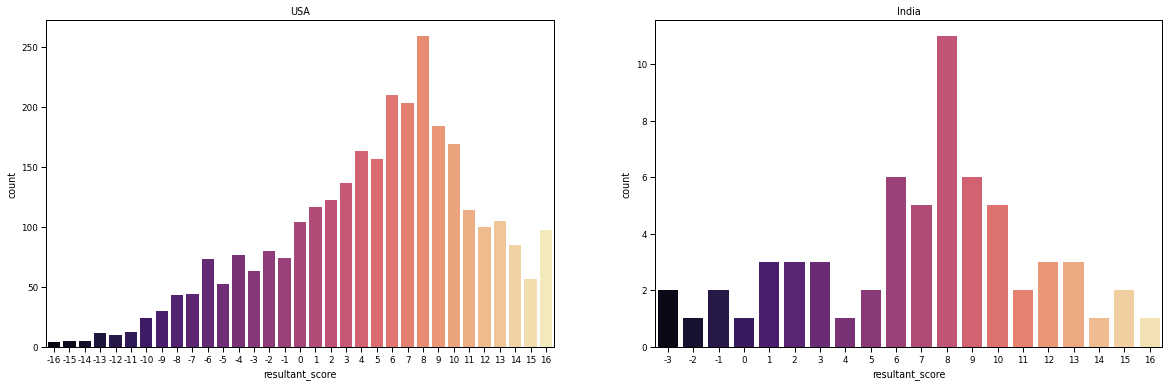

In [522]:
# create plot
fig, ax =plt.subplots(1,2,figsize=(20,6))
sns.countplot(x = 'resultant_score', data = df3_us, palette = 'magma', ax = ax[0]).set_title('USA')
sns.countplot(x = 'resultant_score', data = df3_in, palette = 'magma',ax = ax[1]).set_title('India')

In [523]:
# Considering the fact that there might be cases were the score is neutralised
# Dataset for people from India is comapratively less than those os US.
# Thus considering only highy probable cases where they strongly agree with the hypothesis
# Lets assume from the graph the score should be atleast 2 

In [524]:
print('Mean score:', df3_us[(df3_us['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df3_us[(df3_us['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df3_us[(df3_us['resultant_score'] >2)]['resultant_score'].std())

Mean score: 8.512518409425626
Median score: 8.0
Std Dev score: 3.5764819822874294


In [525]:
print('Mean score:', df3_in[(df3_in['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df3_in[(df3_in['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df3_in[(df3_in['resultant_score'] >2)]['resultant_score'].std())

Mean score: 8.686274509803921
Median score: 8.0
Std Dev score: 3.095094157394448


In [526]:
# Result of Hypothesis suggests
# Mean score of people from US < people from India, by slight margin

# Thus hypothesis can be considered nearly False or neutral 
# An American of age 30+ likes to be closer to romantic partners 'BUT NOT MORE THAN' an Indian of the same age.

In [527]:
# Hypothesis - 4
# Indians have similar expressiveness towards romantic as well as non romantic partners.

In [528]:
df4 = df
# IN dataset 
df4 = df4[(df4['country'] == 'IN')]

In [530]:
# relevant Questions 3,7,9,21,23,29,31,32,33,34 for expressiveness towards romantic partners.
df4_rp = df4[['Q3', 'Q7', 'Q9','Q21','Q23', 'Q29', 'Q31', 'Q32', 'Q33', 'Q34']]
# relevant Questions 1,13,15,17,19,25,27,30,35,36 for expressiveness towards partners.
df4_p = df4[['Q1', 'Q13','Q15', 'Q17','Q19','Q25', 'Q27', 'Q30', 'Q35','Q36']]

In [531]:
# replacing 1,2 which is disagree with -2,-1 respectively
# replacing 4,5 which is agree with 1,2 respectively
# replacing 3 which is neither with 0
df4_rp = df4_rp.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])
df4_p = df4_p.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])

In [533]:
#7,23,21,9
# Aligning the questions according to hypothesis by just changing the sign 
df4_rp['Q7'] = -df4_rp['Q7']
df4_rp['Q9'] = -df4_rp['Q9']
df4_rp['Q21'] = -df4_rp['Q21']
df4_rp['Q23'] = -df4_rp['Q23']
#1,17
# Aligning the questions according to hypothesis by just changing the sign 
df4_p['Q1'] = -df4_p['Q1']
df4_p['Q17'] = -df4_p['Q17']

In [534]:
# scoring denotes how stongly they express
columns_rp = ['Q3', 'Q7', 'Q9','Q21','Q23', 'Q29', 'Q31', 'Q32', 'Q33', 'Q34']
columns_p = ['Q1', 'Q13','Q15', 'Q17','Q19','Q25', 'Q27', 'Q30', 'Q35','Q36']
df4_rp['resultant_score'] = df4_rp[list(columns_rp)].sum(axis=1)
df4_p['resultant_score'] = df4_p[list(columns_p)].sum(axis=1)

Text(0.5, 1.0, 'Patners')

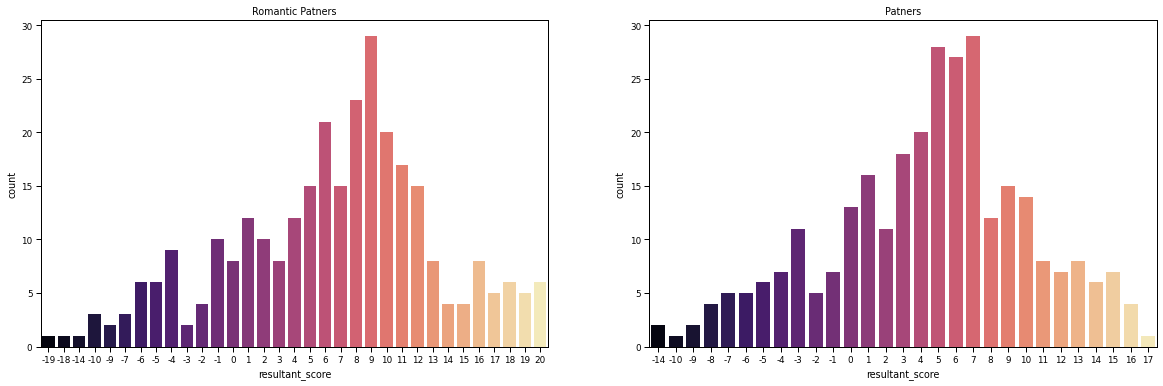

In [536]:
# create plot
fig, ax =plt.subplots(1,2,figsize=(20,6))
sns.countplot(x = 'resultant_score', data = df4_rp, palette = 'magma', ax = ax[0]).set_title('Romantic Patners')
sns.countplot(x = 'resultant_score', data = df4_p, palette = 'magma',ax = ax[1]).set_title('Patners')

In [537]:
# Considering the fact that there might be cases were the score is neutralised
# Dataset for people from India is comapratively less than those os US.
# Thus considering only highy probable cases where they strongly agree with the hypothesis
# Lets assume from the graph the score should be atleast 2 

In [558]:
print('Mean score:', df4_rp[(df4_rp['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df4_rp[(df4_rp['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df4_rp[(df4_rp['resultant_score'] >2)]['resultant_score'].std())

Mean score: 9.710407239819004
Median score: 9.0
Std Dev score: 4.267991897063748


In [559]:
print('Mean score:', df4_p[(df4_p['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df4_p[(df4_p['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df4_p[(df4_p['resultant_score'] >2)]['resultant_score'].std())

Mean score: 7.627450980392157
Median score: 7.0
Std Dev score: 3.4964346897171055


In [542]:
# Result of Hypothesis suggests

# Thus hypothesis is False
# Indians have 'MORE' expressiveness towards romantic patners than non-romantic partners.

In [ ]:
# Summary of hypothesis for N1 dataset

# a) In a romantic partnership, young males (<30) are more anxious and insecure than young females.--------------True
# b) In a partnership (romantic or non romantic), males are more expressive (less hesitant) than females.--------False
# c) An American of age 30+ likes to be closer to romantic partners than an Indian of the same age does.--nearly False
# d) Indians have similar expressiveness towards romantic as well as non romantic partners.----------------------False
